# PRE READING

### In An Introduction to Statistical Learning External link 2nd Edition, read the following sections:

### Sections 4.3 - 4.3.3 Logistic Regression (pages 133-137)

# Exercise: Simple k-NN Classification and Logistic Regression

In [1]:
# import libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Read the "Heart.csv" dataset and take a quick look
heart = pd.read_csv('Heart.csv')

# Force the response into a binary indicator:
heart['AHD'] = 1*(heart['AHD'] == "Yes")

print(heart.shape)

(303, 15)


In [3]:
heart.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0


In [4]:
# split into train and validation
heart_train, heart_val = train_test_split(heart, train_size = 0.75, random_state = 109)

print(heart_train.shape, heart_val.shape)

(227, 15) (76, 15)


In [5]:
# select variables for model estimation: be careful of format 
# (aka, single or double square brackets)
x_train = heart_train[['Age']]
y_train = heart_train['AHD']

# define the model
knn20 = KNeighborsClassifier(n_neighbors=20)

# fit to the data
knn20.fit(x_train , y_train)


KNeighborsClassifier(n_neighbors=20)

In [6]:
### edTest(test_knn) ###

# there are two types of predictions in classification models in sklearn
# model.predict for pure classifications, and model.predict_proba for probabilities

# create the predictions based on the train data
yhat20_class = knn20.predict(x_train)
yhat20_prob = knn20.predict_proba(x_train)

# print out the first 10 predictions for the actual data
print(yhat20_class[1:10])
print(yhat20_prob[1:10])

[0 1 1 1 0 1 1 0 1]
[[0.8  0.2 ]
 [0.4  0.6 ]
 [0.25 0.75]
 [0.3  0.7 ]
 [0.7  0.3 ]
 [0.45 0.55]
 [0.3  0.7 ]
 [0.7  0.3 ]
 [0.35 0.65]]


In [7]:
### edTest(test_logit) ###
# Create a logistic regression model, with None as the penalty

logit1 = LogisticRegression(penalty=None, max_iter = 1000)

#Fit the model using the training set

logit1.fit(x_train,y_train)

# Get the coefficient estimates

print("Logistic Regression Estimated Betas (B0,B1):",logit1.intercept_,logit1.coef_)


Logistic Regression Estimated Betas (B0,B1): [-3.32616703] [[0.05933142]]


In [8]:
# Confirm the probability calculation you made above using logit1logit1.predict_proba()
# predict for one observation where age = 60.  Hint: double brackets is one way to do it

logit1.predict_proba(heart[['Age']]==60)
yhat20_prob_logit = logit1.predict_proba(x_train)

In [9]:
### edTest(test_accuracy) ###

# Define the equivalent validation variables from `heart_val`

x_val = heart_val[['Age']]
y_val = heart_val['AHD']

# Compute the training & validation accuracy using the estimator.score() function

knn20_train_accuracy = knn20.score(x_train, y_train)
knn20_val_accuracy = knn20.score(x_val, y_val)

logit_train_accuracy = logit1.score(x_train,y_train)
logit_val_accuracy = logit1.score(x_val,y_val)

# Print the accuracies below

print("k-NN Train & Validation Accuracy:", knn20_train_accuracy, knn20_val_accuracy)
print("Logisitic Train & Validation Accuracy:", logit_train_accuracy, logit_val_accuracy)

k-NN Train & Validation Accuracy: 0.6299559471365639 0.5526315789473685
Logisitic Train & Validation Accuracy: 0.6387665198237885 0.6052631578947368


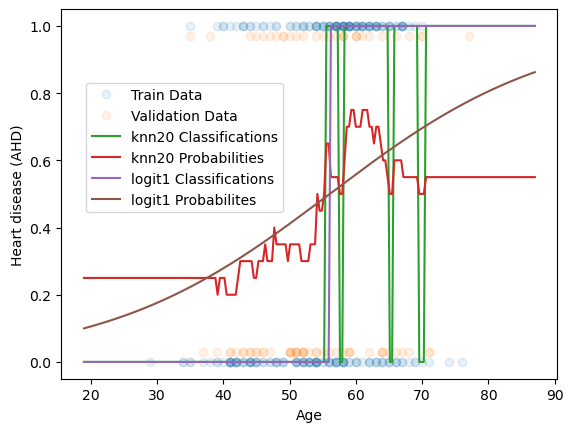

In [19]:
# set-up the dummy x for plotting: we extend it a little bit beyond the range of observed values 
x = np.linspace(np.min(heart[['Age']])-10,np.max(heart[['Age']])+10,200).reshape(-1, 1) 


# be careful in pulling off only the correct column of the probability calculations: use `[:,1]`
yhat_class_knn20 = knn20.predict(x)
yhat_prob_knn20 = knn20.predict_proba(x)[:, 1]

yhat_class_logit = logit1.predict(x)
yhat_prob_logit = logit1.predict_proba(x)[:, 1]

# plot the observed data.  Note: we offset the validation points to make them more clearly differentiated from train
plt.plot(x_train, y_train, 'o' ,alpha=0.1, label='Train Data')
plt.plot(x_val, 0.94*y_val+0.03, 'o' ,alpha=0.1, label='Validation Data')

# plot the predictions
plt.plot(x, yhat_class_knn20, label='knn20 Classifications')
plt.plot(x, yhat_prob_knn20, label='knn20 Probabilities')
plt.plot(x, yhat_class_logit, label='logit1 Classifications')
plt.plot(x, yhat_prob_logit, label='logit1 Probabilites')

# put the lower-left part of the legend 5% to the right along the x-axis, and 45% up along the y-axis
plt.legend(loc=(0.05,0.45))

# Don't forget your axis labels!
plt.xlabel("Age")
plt.ylabel("Heart disease (AHD)")

plt.show()

# Exercise: Guesstimating Beta values for Logistic Regression

In [196]:
# import important libraries

%matplotlib inline
import sys
import numpy as np
import pandas as pd
from math import exp
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score

In [197]:
# Make a dataframe of the file "insurance_claim.csv"

data_filename = 'insurance_claim.csv'
df = pd.read_csv(data_filename)

In [198]:
# Take a quick look of the data, notice that the response variable is binary

df.head()

,age,insuranceclaim
0,18.437371,0
1,19.539508,0
2,19.921685,0
3,20.625442,0
4,21.139852,0


In [199]:
# Assign age as the predictor variable 
x = df["age"].values

# Assign insuranceclaim as the response variable
y = df["insuranceclaim"].values


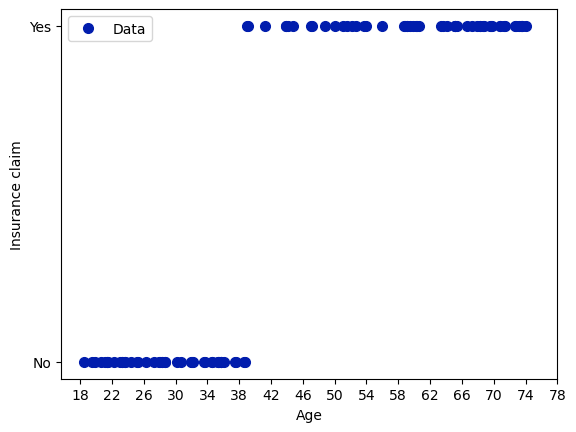

In [200]:
# Make a plot of the response (insuranceclaim) vs the predictor (age)
plt.plot(x,y,'o', markersize=7,color="#011DAD",label="Data")

# Add the labels for the axes
plt.xlabel("Age")
plt.ylabel("Insurance claim")

plt.xticks(np.arange(18, 80, 4.0))

# Label the value 1 as 'Yes' & 0 as 'No'
plt.yticks((0,1), labels=('No', 'Yes'))
plt.legend(loc='best')
plt.show()

In [201]:
### edTest(test_beta_guesstimate) ###

beta0 = -39

beta1 = 1


In [202]:
### edTest(test_beta_computation) ###
def logistic(x):
    return 1 / (1 + np.exp(-x))
    
# P(y=1|x_i) for each x_i in x
probas = logistic(beta0 + beta1 * x) 

In [203]:
# Get classification predictions

y_pred = np.where(probas >= 0.5, 1, 0)

In [204]:
### edTest(test_acc) ###
# Use accuracy_score function to find the accuracy 

accuracy = accuracy_score(y, y_pred)

# Print the accuracy
print(accuracy)

1.0


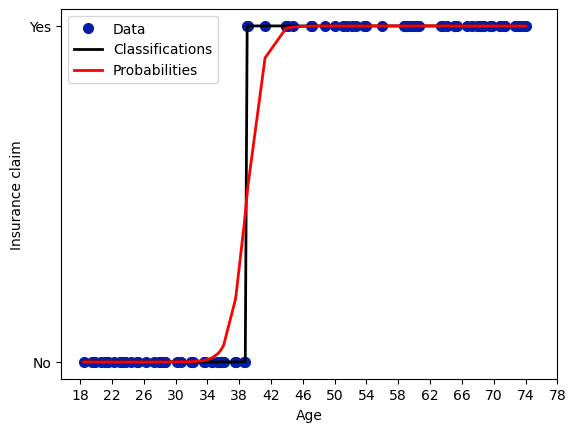

In [205]:
# Make a plot similar to the one above along with the fit curve
plt.plot(x, y,'o', markersize=7,color="#011DAD",label="Data")

plt.plot(x,y_pred,linewidth=2,color='black',label="Classifications")
plt.plot(x,probas,linewidth=2,color='red',label="Probabilities")

plt.xticks(np.arange(18, 80, 4.0))
plt.xlabel("Age")
plt.ylabel("Insurance claim")
plt.yticks((0,1), labels=('No', 'Yes'))
plt.legend()
plt.show()